In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mingus

In [4]:
df = pd.read_csv('metadata.csv', sep = ',')
df.head()

,Filename,Loc,Acorde,Arquivo Original
0,file_1393.wav,processed_audio/,A#:min,01_SS2-88-F_comp_hex.wav
1,file_1394.wav,processed_audio/,D#:7,01_SS2-88-F_comp_hex.wav
2,file_1395.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav
3,file_1396.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav
4,file_1397.wav,processed_audio/,G:hdim7,01_SS2-88-F_comp_hex.wav


In [8]:
nchords = len(df['Acorde'].unique())
print('Temos um total de', nchords, 'acordes')

Temos um total de 42 acordes


Classificar 42 acordes pode ser uma tarefa computacionalmente custosa

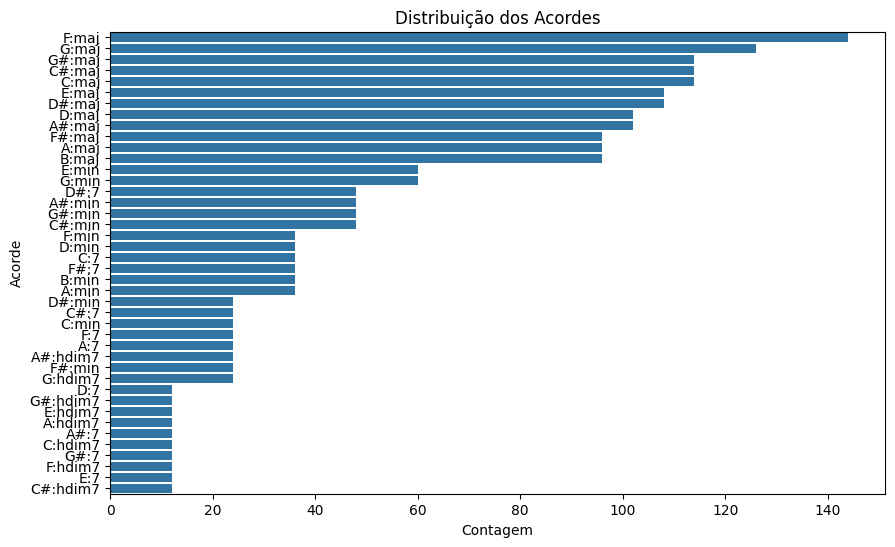

In [10]:

df_chord = df['Acorde'].value_counts().to_frame().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(y = 'Acorde', x = 'count', data = df_chord )
ax.set(xlabel = 'Contagem', title = 'Distribuição dos Acordes')
plt.show()

In [11]:
df_chord[:15]

,Acorde,count
0,F:maj,144
1,G:maj,126
2,G#:maj,114
3,C#:maj,114
4,C:maj,114
5,E:maj,108
6,D#:maj,108
7,D:maj,102
8,A#:maj,102
9,F#:maj,96


In [12]:
# 1128 imagens disponíveis
df_chord[:10].sum()

Acorde    F:majG:majG#:majC#:majC:majE:majD#:majD:majA#:...
count                                                  1128
dtype: object

In [27]:
most_freq = df_chord[:10]['Acorde'].to_numpy()

df['most_freq'] = ['1' if i in most_freq else '0' for i in df['Acorde'] ]


In [53]:
most_freq

array(['F:maj', 'G:maj', 'G#:maj', 'C#:maj', 'C:maj', 'E:maj', 'D#:maj',
       'D:maj', 'A#:maj', 'F#:maj'], dtype=object)

In [57]:
df[df['most_freq'] == '1']

,Filename,Loc,Acorde,Arquivo Original,most_freq
2,file_1395.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav,1
3,file_1396.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav,1
9,file_1402.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav,1
10,file_1403.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav,1
14,file_2487.wav,processed_audio/,D:maj,05_Jazz1-130-D_comp_hex.wav,1
...,...,...,...,...,...
2153,file_180804.wav,processed_audio/,G#:maj,00_Funk3-112-C#_comp_hex.wav,1
2156,file_180807.wav,processed_audio/,F#:maj,00_Funk3-112-C#_comp_hex.wav,1
2157,file_180808.wav,processed_audio/,C#:maj,00_Funk3-112-C#_comp_hex.wav,1
2158,file_180809.wav,processed_audio/,F#:maj,00_Funk3-112-C#_comp_hex.wav,1


In [56]:
#df.to_csv('metadata_final.csv', sep = ',', index = False)

# Notas dos Acordes

In [15]:
import mingus.core.notes as notes

In [16]:
notes.is_valid_note("C")

True

In [28]:
most_freq

array(['F:maj', 'G:maj', 'G#:maj', 'C#:maj', 'C:maj', 'E:maj', 'D#:maj',
       'D:maj', 'A#:maj', 'F#:maj'], dtype=object)

In [36]:
import mingus.core.chords as chords

note_list = []
for i in most_freq:
    i = i.replace(':', '')
    print(i)
    notas = chords.from_shorthand(i)
    print(notas)
    for j in notas:
        note_list.append(j)

Fmaj
['F', 'A', 'C']
Gmaj
['G', 'B', 'D']
G#maj
['G#', 'B#', 'D#']
C#maj
['C#', 'E#', 'G#']
Cmaj
['C', 'E', 'G']
Emaj
['E', 'G#', 'B']
D#maj
['D#', 'F##', 'A#']
Dmaj
['D', 'F#', 'A']
A#maj
['A#', 'C##', 'E#']
F#maj
['F#', 'A#', 'C#']


In [41]:
print('No total temos' , len(set(note_list)), 'notas únicas compartilhadas entre os 10 acordes')

No total temos 16 notas únicas compartilhadas entre os 10 acordes
